<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LauraIran7/blob/main/Actividades/TecMty_Regresion_lineal_polinomial_A01794099.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tecnológico de Monterrey

#Maestría en Inteligencia Artificial Aplicada (MNA-V)

##Curso: Ciencia y Analítica de Datos
###Actividad Semanal -- 7 Regresiones y K means (Regresión)

Fecha de Entrega: Miércoles 9 de Noviembre de 2022.

**Prof: Dra. María de la Paz Rico Fernández**

**Alumna: Laura Irán González Ojeda - A01794099**

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

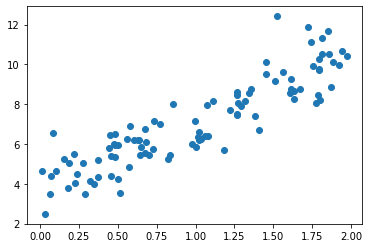

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

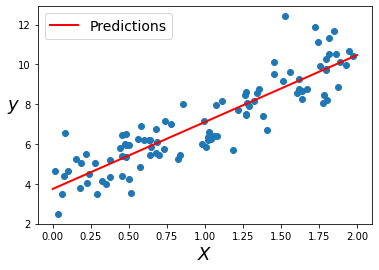

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [12]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

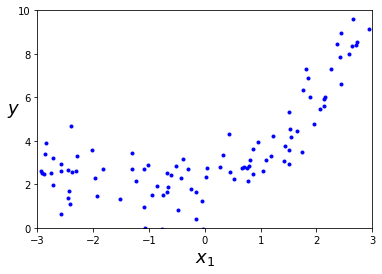

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [14]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [17]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [18]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [19]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

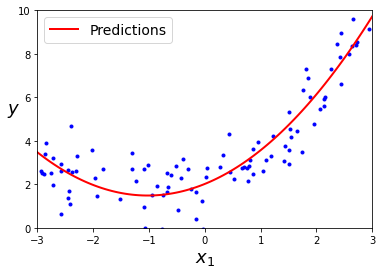

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [83]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
747,5.320845,39.790284
597,4.787700,33.916306
161,3.133644,56.183945
759,5.372548,31.049977
211,3.371696,38.754760
170,3.182915,45.496473
345,3.969255,44.564894
430,4.226731,37.715435
442,4.254261,30.261016
782,5.473178,29.967092


In [84]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [85]:
len(X)

1000

In [86]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

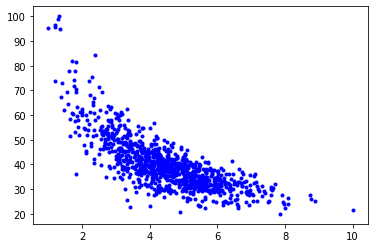

In [87]:
plt.plot(X,y,'b.')

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

##**Regresión Lineal**


Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [102]:
#lineal
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

Y_new = lr_model.predict(X_test)

print('Coeficiente: ',lr_model.coef_)
print('Termino independiente: ',lr_model.intercept_)

Coeficiente:  [-6.14066196]
Termino independiente:  67.51071463726647


In [103]:
Res_lineal = Y_new - y_test
Res_lineal

521    1.128489
737    1.825724
740    0.459450
660    1.636541
411   -1.261971
         ...   
914   -7.002464
810   -1.492182
244   -2.716559
822   -2.124320
321    0.617945
Name: Manufacturing Cost, Length: 150, dtype: float64

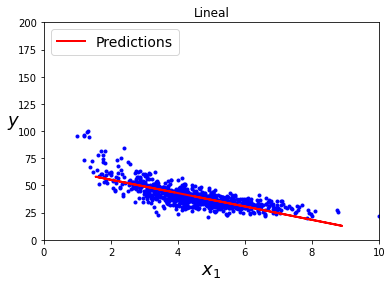

In [104]:
y_fit = lr_model.predict(X_test)

plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lineal")
plt.axis([0, 10, 0, 200]);

In [105]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = Y_new
y=y_test

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.476124068321028
Root Mean Squared Error: 5.809995849705496
r2_score 0.6171546016469538


##**Regresión Polinomial**


Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [106]:
#polinomial

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

lr_p_model = LinearRegression(fit_intercept=True)
lr_p_model.fit(X_poly_train, y_train)

print('Coeficiente: ',lr_p_model.coef_)
print('Termino independiente: ',lr_p_model.intercept_)

Coeficiente:  [-34.72324299   5.13032262  -0.26800797]
Termino independiente:  114.08628923875374


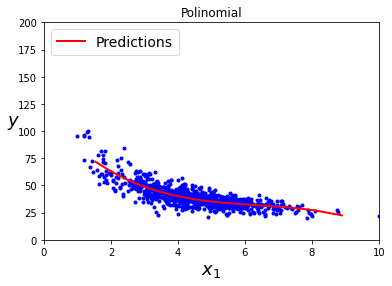

In [107]:
X_poly_test = poly_features.fit_transform(X_test)
y_pred = lr_p_model.predict(X_poly_test)

order = np.argsort(X_test.values.ravel())

sortedXPoly = X_test.values.ravel()[order]
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_pred[order]


plt.plot(X_train, y_train, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [108]:
Res_Poly = y_pred - y_test
Res_Poly

521   -1.425756
737    1.075160
740   -0.265542
660    0.137475
411   -4.095797
         ...   
914   -4.084676
810   -1.251101
244   -4.963262
822   -1.692612
321   -2.126011
Name: Manufacturing Cost, Length: 150, dtype: float64

In [109]:
y_pred = sorted_predicPoly
y=sortedYPoly

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.169983343477572
Root Mean Squared Error: 5.563121283947493
r2_score 0.6489986040637794


##**Regresión con Ridge**

In [110]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline

Ridge_model = Ridge(alpha= 1)
Ridge_model.fit(X_train, y_train)

print('Coeficiente: ',Ridge_model.coef_)
print('Termino independiente: ',Ridge_model.intercept_)

Coeficiente:  [-6.13658407]
Termino independiente:  67.4924987903851


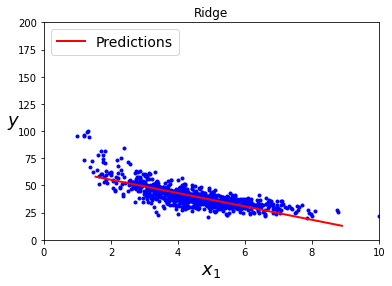

In [111]:
y_pred = Ridge_model.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXRidge = X_test.values.ravel()[order]
sortedYRidge = y_test.values.ravel()[order]
sorted_predicRidge = y_pred[order]


plt.plot(X_train, y_train, "b.")
plt.plot(sortedXRidge, sorted_predicRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Ridge")
plt.axis([0, 10, 0, 200]);

In [112]:
Res_Ridge = y_pred - y_test
Res_Ridge

521    1.128700
737    1.829059
740    0.462817
660    1.638840
411   -1.263132
         ...   
914   -6.995182
810   -1.487665
244   -2.720265
822   -2.119591
321    0.615544
Name: Manufacturing Cost, Length: 150, dtype: float64

In [113]:
y_pred = sorted_predicRidge
y=sortedYRidge

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.475592335854932
Root Mean Squared Error: 5.809102693316004
r2_score 0.6172723003647191


##**Regresión con Lasso**

In [114]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

Lasso_model = Lasso(alpha = 1)
Lasso_model.fit(X_train, y_train)

print('Coeficiente: ',Lasso_model.coef_)
print('Termino independiente: ',Lasso_model.intercept_)

Coeficiente:  [-5.57581899]
Termino independiente:  64.98757314954486


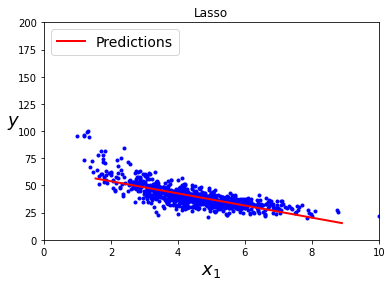

In [115]:
y_pred = Lasso_model.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXLasso = X_test.values.ravel()[order]
sortedYLasso = y_test.values.ravel()[order]
sorted_predicLasso = y_pred[order]


plt.plot(X_train, y_train, "b.")
plt.plot(sortedXLasso, sorted_predicLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lasso")
plt.axis([0, 10, 0, 200]);

In [117]:
Res_Lasso = y_pred - y_test
Res_Lasso

521    1.157698
737    2.287602
740    0.925850
660    1.954897
411   -1.422776
         ...   
914   -5.993734
810   -0.866525
244   -3.229874
822   -1.469273
321    0.285374
Name: Manufacturing Cost, Length: 150, dtype: float64

In [118]:
y_pred = sorted_predicLasso
y=sortedYLasso

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYLasso, sorted_predicLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYLasso, sorted_predicLasso)))
print('r2_score',r2_score(sortedYLasso, sorted_predicLasso))

Error medio Absoluto (MAE): 4.435821067963493
Root Mean Squared Error: 5.7365175635060925
r2_score 0.6267769631700428


##**Comparación de Modelos**

Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)


Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

MAE Regresión Lineal: 4.476124068321028
MAE Regresión Polinomial: 4.169983343477572
MAE Regresión con Ridge: 4.475592335854932
MAE Regresión con Lasso: 4.435821067963493


Text(0.5, 1.0, 'Comparación de modelos con MAE')

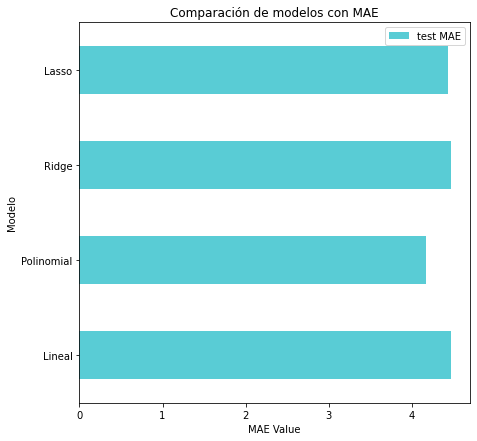

In [119]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_new)
MAE_Polinomial = metrics.mean_absolute_error(sortedYPoly, sorted_predicPoly)
MAE_Ridge = metrics.mean_absolute_error(sortedYRidge, sorted_predicRidge)
MAE_Lasso = metrics.mean_absolute_error(sortedYLasso, sorted_predicLasso)

print('MAE Regresión Lineal:', MAE_lineal)
print('MAE Regresión Polinomial:', MAE_Polinomial)
print('MAE Regresión con Ridge:', MAE_Ridge)
print('MAE Regresión con Lasso:', MAE_Lasso)

df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_Polinomial, MAE_Ridge, MAE_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 7))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color = '#59CCD5')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')

ax.set_title('Comparación de modelos con MAE')

R2 Regresión Lineal: 0.6171546016469538
R2 Regresión Polinomial: 0.6489986040637794
R2 Regresión con Ridge: 0.6489986040637794
R2 Regresión con Lasso: 0.6489986040637794


Text(0.5, 1.0, 'Comparación de modelos con R2')

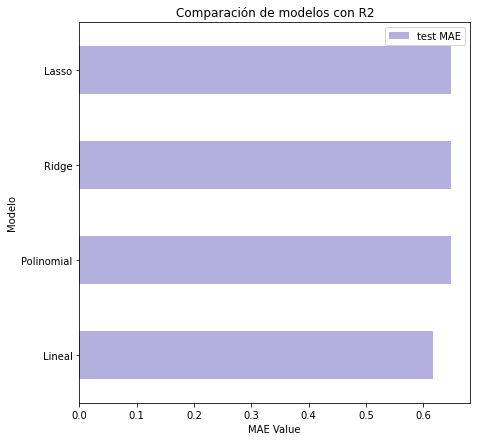

In [120]:
R2_lineal = metrics.r2_score(y_test, Y_new)
R2_Polinomial = metrics.r2_score(sortedYPoly, sorted_predicPoly)
R2_Ridge = metrics.r2_score(sortedYPoly, sorted_predicPoly)
R2_Lasso = metrics.r2_score(sortedYPoly, sorted_predicPoly)

print('R2 Regresión Lineal:', R2_lineal)
print('R2 Regresión Polinomial:', R2_Polinomial)
print('R2 Regresión con Ridge:', R2_Ridge)
print('R2 Regresión con Lasso:', R2_Lasso)


df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_Polinomial, R2_Ridge, R2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 7))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color = '#B3AFDF')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos con R2')

Explica tus resultados:

- **¿Que método conviene más a la empresa? ¿por que?**

El método polinomial, ya que como se observa en los resultados de errores MAE, RMSE y R2 este método es el que menor margen de error tiene en las predicciones.

- **¿Que porcentajes de entrenamiento y evaluación?**

Para este análisis, tomé 85% de datos para entrenamiento y 15% para validación.

- **¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Los resultados del modelo polinomial fueron los siguientes:
 - Error medio Absoluto (MAE): 4.169983343477572
 - Root Mean Squared Error: 5.563121283947493
 - r2_score 0.6489986040637794

En la comparativa del error MAE el modelo polinomial es representa el margen más bajo, lo cual es bueno. En el caso de R2 el modelo polinomial no representa el valor más bajo, sin embargo una métrica de 0.64 considero que es un buen desempeño.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [123]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [124]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


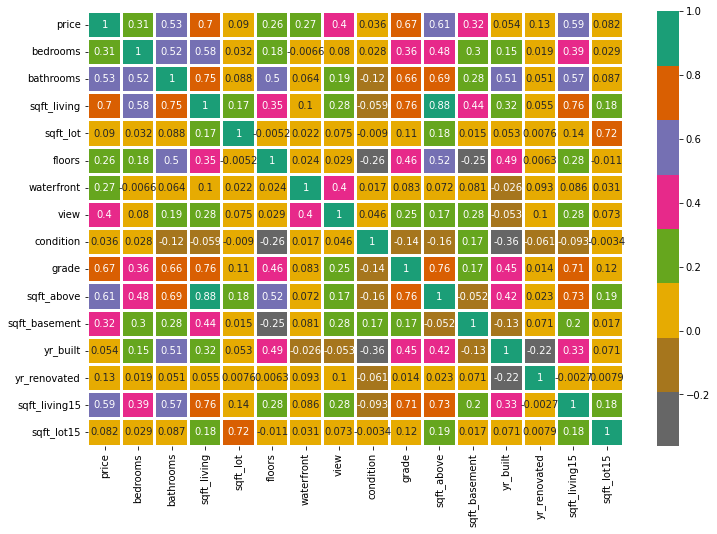

In [125]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [137]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [140]:
#tu codigo aquí

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

lr_p_model = LinearRegression(fit_intercept=True)
lr_p_model.fit(X_poly_train, y_train)

X_poly_test = poly_features.fit_transform(X_test)
y_pred = lr_p_model.predict(X_poly_test)

print('Coeficiente: ',lr_p_model.coef_)
print('Termino independiente: ',lr_p_model.intercept_)

Coeficiente:  [[ 9.33879687e+05 -1.09273860e+06 -5.37390428e+02 -2.78634102e+01
  -2.07489950e+06 -3.95371495e+06 -2.88652531e+05  5.58519576e+05
   1.09862983e+06 -1.38818478e+02 -3.01577501e+02 -8.59702783e+04
  -2.95366775e+03  3.99963414e+03 -3.40100355e+01  9.57586804e+02
   7.49940820e+03 -1.40076562e+01 -1.85239669e-02  8.58010319e+03
  -1.14952153e+04 -3.08060610e+02 -5.24565914e+03 -5.36863409e+03
  -9.99978948e-01 -1.43956003e+01 -4.67077597e+02 -9.13138297e+00
   1.72800783e+01  2.15615872e-01 -9.63204388e+03  1.52795786e+01
  -1.35647630e-01 -2.59102127e+04  4.33756643e+04  3.82989181e+03
  -1.08068921e+03  2.22968388e+04  1.45391755e+01  1.44644985e+00
   5.03114428e+02 -1.70846902e+01 -1.72874570e+01 -5.60714143e-02
  -4.03248131e+00 -5.41426547e+00  4.83377617e+00  1.60300670e+02
  -1.42705827e+01  1.31213999e+01  2.07436184e+01  5.09311380e+00
   2.80584168e+00  6.59334209e-01 -1.80580810e-01 -9.38519281e-01
   6.96385656e+00  3.06405127e-07  4.40874362e-01 -9.83935453e

In [141]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
r2_score 0.7797924413783968
